# Taller 1: Análisis de Sobrevida con Python

## 1. Introducción

El análisis de sobrevida es una técnica estadística empleada para estudiar el tiempo que transcurre hasta la ocurrencia de un evento de interés, como la muerte, la recuperación o la recaída de una enfermedad. Este tipo de análisis es fundamental en áreas como la medicina, la epidemiología y las ciencias sociales, donde no solo importa si ocurre un evento, sino cuándo ocurre.

En este taller, utilizaremos Python para realizar análisis de sobrevida en una cohorte simulada de pacientes, enfocándonos en los métodos no paramétricos (Kaplan-Meier y log-rank test) y en la regresión de Cox para evaluar variables predictoras. Este enfoque permite extraer información valiosa sobre los factores que afectan el tiempo de sobrevida en distintos grupos poblacionales.

## 2. Objetivos

Al finalizar este taller, los y las estudiantes serán capaces de:

* Fundamentos del análisis de sobrevida*
    - Entender conceptos clave como tiempo a evento, censura y función de sobrevida.
    - Representar datos de tiempo a evento en formato adecuado para análisis.

* Métodos no paramétricos
    - Calcular y graficar curvas de sobrevida utilizando el método de Kaplan-Meier.
    - Comparar la sobrevida entre dos o más grupos utilizando el test de log-rank.
    - Interpretar visualmente diferencias en la sobrevida.

* Regresión de Cox
    - Ajustar un modelo de riesgos proporcionales de Cox para evaluar predictores de sobrevida.
    - Interpretar coeficientes del modelo como razones de riesgo (hazard ratios).
    - Evaluar supuestos del modelo de Cox, como la proporcionalidad de riesgos.

* Visualización e interpretación
    - Generar gráficos de curvas de sobrevida con intervalos de confianza.
    - Interpretar y comunicar resultados en términos clínicos o de salud pública.
    - Aplicar análisis de sobrevida en el contexto de datos reales o simulados del Ministerio de Salud.


## 3. Descripción del Dataset

El **AIDS Clinical Trials Group Study 175** Dataset, publicado inicialmente en 1996, es una colección completa de estadísticas de salud e información categórica sobre pacientes diagnosticados con SIDA. Este dataset fue creado con el propósito principal de examinar el desempeño de diferentes tipos de tratamientos para el SIDA: zidovudina (AZT) versus didanosina (ddI), AZT más ddI y AZT más zalcitabina (ddC). La tarea de predicción asociada a este dataset consiste en determinar si cada paciente falleció dentro de una ventana de tiempo específica.

El dataset fue creado para evaluar la eficacia y seguridad de varios tratamientos para el SIDA, comparando específicamente el desempeño de AZT, ddI y ddC en la prevención de la progresión de la enfermedad en pacientes infectados con VIH con conteos de CD4 entre 200 y 500 células/mm³. Este ensayo de intervención tenía como objetivo aportar información sobre la efectividad de la monoterapia frente a la terapia combinada con análogos de nucleósidos.

Se encuentra representado por 24 variables y 2139 observaciones mediante una tabla. Las variables incluyen información sobre el tiempo de supervivencia, edad, peso, diagnóstico, evento clínico, entre otras.

El dataset se encuentra disponible en la plataforma Kaggle, y puede ser descargado manualmente desde el siguiente enlace: [AIDS Clinical Trials Dataset](https://www.kaggle.com/datasets/tanshihjen/aids-clinical-trials). 

<div style="text-align:center;">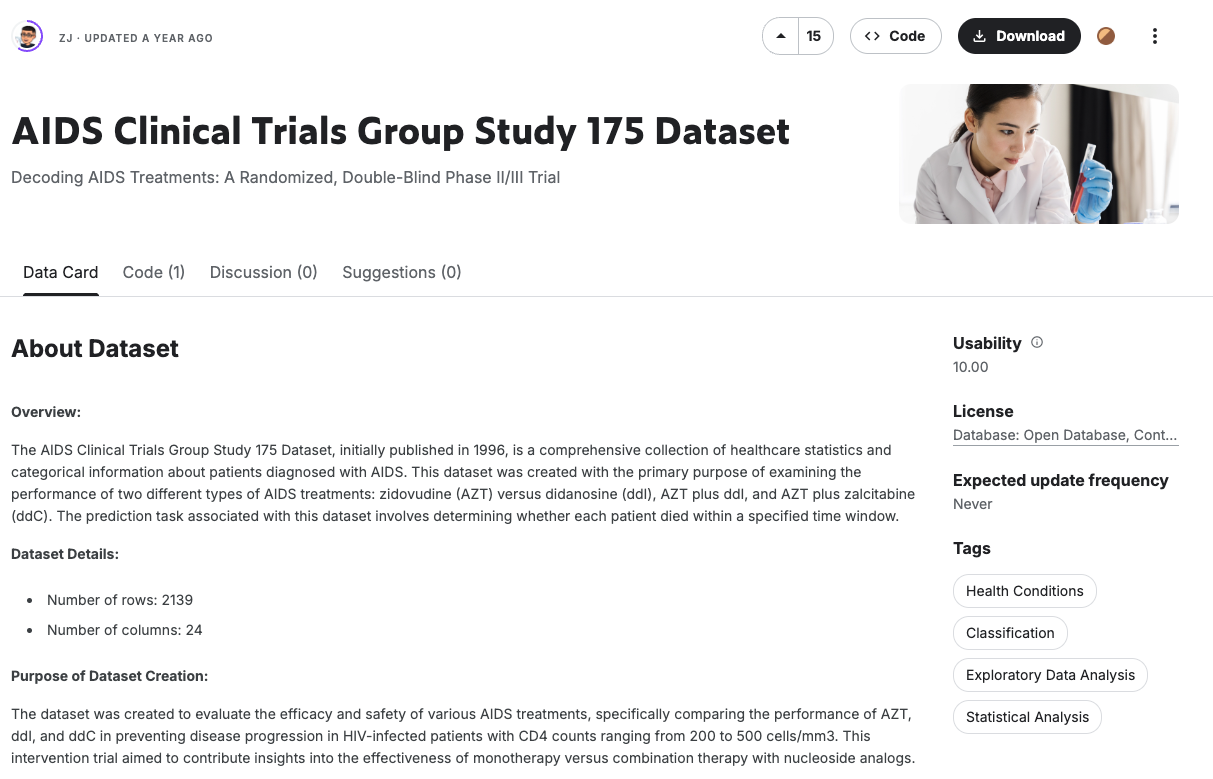</div>

Descarga de datos mediante Kaggle API:

In [ ]:
# importar librerias necesarias
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt


# Descargar el dataset "aids-clinical-trials" de Kaggle
folder = kagglehub.dataset_download("tanshihjen/aids-clinical-trials")
print("Ruta a la carpeta:", folder)

# Ruta al archivo descargado
path = os.path.join(folder, "AIDS_ClinicalTrial_GroupStudy175.csv")
print("Ruta al archivo:", path)

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(path)
print(df)

#### **Ejercicio 1** 

Describa las principales características del conjunto de datos: número de observaciones, porcentaje de censura, distribución del tiempo hasta el evento.

In [ ]:
# <CODE>


#### **Ejercicio 2** 

Estime la curva de sobrevida utilizando el método de Kaplan-Meier para el conjunto completo de datos. Genere un gráfico con el estimador. HINT: Utilice el paquete `lifelines` para realizar el ajuste y graficar la curva de sobrevida.


In [ ]:
# <CODE>


#### **Ejercicio 3** 
Compare la sobrevida entre los grupos `ZDV only`y `ddI only` utilizando el test de log-rank. Genere un gráfico con las curvas de sobrevida y el valor p del test. Responda:
- ¿Existen diferencias significativas en la sobrevida entre estos dos grupos?
- ¿Cómo se interpretan las curvas de sobrevida en este contexto?

In [ ]:
# <CODE>


#### **Ejercicio 4** 
Ajuste un modelo de regresión de Cox para evaluar el efecto de las variables `age`, `wtkg`, `trt`, `str2`, `gender` y `race` sobre la sobrevida. Interprete los coeficientes del modelo como razones de riesgo (hazard ratios). Responda:
* ¿Qué variables son estadísticamente significativas en el modelo?


In [ ]:
from lifelines import CoxPHFitter

# Crear un nuevo dataframe solo con las variables relevantes
variables_modelo = ['time', 'label', 'age','wtkg' ,'trt', 'str2', 'gender', 'race']
df_modelo = df[variables_modelo].copy()

# Ajustar el modelo de Cox
cph = CoxPHFitter()
cph.fit(df_modelo, duration_col='time', event_col='label')

# Mostrar resumen
cph.print_summary()



#### **Ejercicio 5** 
Interprete los coeficientes del modelo de Cox. Identifique qué variables están significativamente asociadas con el tiempo de sobrevida y si aumentan o disminuyen el riesgo.

In [ ]:
# <CODE>


#### **Ejercicio 6** 
Evalúe gráficamente el supuesto de riesgos proporcionales del modelo de Cox. Interprete los resultados. ¿Se cumple el supuesto de proporcionalidad de riesgos?

In [ ]:
# <CODE>
